In [ ]:
# Install library
!pip install financedatabase -U

In [ ]:
# Import library
import financedatabase as fd
from financetoolkit import Toolkit
import pyspark
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.style.use('bmh')
from pyspark.sql import SparkSession
pd.set_option('display.max_columns', None)

## Data Extraction

In [ ]:
# Optional Financial Modeling Prep API key for Finance Toolkit functionality
API_KEY = "YOUR_API_KEY"

# Initialize the Equities database
equities = fd.Equities()

# Obtain all countries from the database
equities.select()

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
000002.SZ,"China Vanke Co., Ltd.","China Vanke Co., Ltd., together with its subsi...",CNY,Real Estate,Real Estate,Real Estate Management & Development,SHZ,Shenzhen Stock Exchange,China,NaN,Shenzhen,518083,http://www.vanke.com,Large Cap,CNE100001SR9,NaN,NaN,NaN,NaN
000004.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
000005.SZ,Shenzhen Fountain Corporation,Shenzhen Fountain Corporation engages in real ...,CNY,Real Estate,Real Estate,Real Estate Management & Development,SHZ,Shenzhen Stock Exchange,China,NaN,Shenzhen,518001,http://www.fountain.com.cn,Small Cap,CNE0000001L7,NaN,NaN,NaN,NaN
000006.SZ,"Shenzhen Zhenye (Group) Co.,Ltd.","Shenzhen Zhenye (Group) Co.,Ltd. engages in th...",CNY,Real Estate,Real Estate,Real Estate Management & Development,SHZ,Shenzhen Stock Exchange,China,NaN,Shenzhen,518008,http://www.zhenye.com,Small Cap,CNE000000164,NaN,NaN,NaN,NaN
000007.SZ,"Shenzhen Quanxinhao Co., Ltd.","Shenzhen Quanxinhao Co., Ltd. owns and operate...",CNY,Consumer Discretionary,Consumer Services,"Hotels, Restaurants & Leisure",SHZ,Shenzhen Stock Exchange,China,NaN,Shenzhen,518031,http://www.sz000007.com,Micro Cap,CNE0000000P0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZMS.SG,Commerzbank AG,Commerzbank AG provides banking and capital ma...,EUR,Financials,Banks,Banks,STU,Stuttgart Stock Exchange,Germany,NaN,Frankfurt am Main,60311,http://www.commerzbank.com,Mid Cap,NaN,NaN,NaN,NaN,NaN
ZZVA.BE,Deutsche Bank AG,NaN,EUR,NaN,NaN,NaN,BER,Berlin Stock Exchange,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZZVA.DU,Deutsche Bank AG,NaN,EUR,NaN,NaN,NaN,DUS,Dusseldorf Stock Exchange,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Obtain all possible options for equities
fd.show_options("equities")

{'currency': array(['ARS', 'AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CNY', 'COP', 'CZK',
        'DKK', 'EUR', 'GBP', 'HKD', 'HUF', 'IDR', 'ILA', 'ILS', 'INR',
        'ISK', 'JPY', 'KES', 'KRW', 'LKR', 'MXN', 'MYR', 'NOK', 'NZD',
        'PEN', 'PHP', 'PLN', 'QAR', 'RUB', 'SAR', 'SEK', 'SGD', 'THB',
        'TRY', 'TWD', 'USD', 'ZAC', 'ZAR'], dtype=object),
 'sector': array(['Communication Services', 'Consumer Discretionary',
        'Consumer Staples', 'Energy', 'Financials', 'Health Care',
        'Industrials', 'Information Technology', 'Materials',
        'Real Estate', 'Utilities'], dtype=object),
 'industry_group': array(['Automobiles & Components', 'Banks', 'Capital Goods',
        'Commercial & Professional Services',
        'Consumer Durables & Apparel', 'Consumer Services',
        'Diversified Financials', 'Energy', 'Food & Staples Retailing',
        'Food, Beverage & Tobacco', 'Health Care Equipment & Services',
        'Household & Personal Products', 'Insurance', 'Materials

In [ ]:
# Obtain all equities in United States
equities.show_options(country="United States")

{'currency': array(['ARS', 'AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CNY', 'CZK', 'DKK',
        'EUR', 'GBP', 'HKD', 'HUF', 'IDR', 'ILA', 'INR', 'JPY', 'KRW',
        'LKR', 'MXN', 'MYR', 'NOK', 'NZD', 'PLN', 'QAR', 'RUB', 'SEK',
        'SGD', 'THB', 'TRY', 'TWD', 'USD', 'ZAC'], dtype=object),
 'sector': array(['Communication Services', 'Consumer Discretionary',
        'Consumer Staples', 'Energy', 'Financials', 'Health Care',
        'Industrials', 'Information Technology', 'Materials',
        'Real Estate', 'Utilities'], dtype=object),
 'industry_group': array(['Automobiles & Components', 'Banks', 'Capital Goods',
        'Commercial & Professional Services',
        'Consumer Durables & Apparel', 'Consumer Services',
        'Diversified Financials', 'Energy', 'Food & Staples Retailing',
        'Food, Beverage & Tobacco', 'Health Care Equipment & Services',
        'Household & Personal Products', 'Insurance', 'Materials',
        'Media & Entertainment',
        'Pharmaceuticals, Bi

In [ ]:
# Obtain all equities in United States within the 'Construction & Engineering' industry under the 'Industrials' sector.
equities.show_options(
    selection="industry",
    sector="Industrials",
    country="United States"
)

array(['Aerospace & Defense', 'Air Freight & Logistics', 'Airlines',
       'Building Products', 'Commercial Services & Supplies',
       'Construction & Engineering', 'Electrical Equipment',
       'Industrial Conglomerates', 'Machinery', 'Marine',
       'Professional Services', 'Road & Rail',
       'Trading Companies & Distributors',
       'Transportation Infrastructure'], dtype=object)

In [ ]:
# Obtain all Construction & Engineering equities in United States
equities.select(
    country="United States",
    industry="Construction & Engineering",
    market="New York Stock Exchange"
)

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
ACM,AECOM,"AECOM, together with its subsidiaries, deliver...",USD,Industrials,Capital Goods,Construction & Engineering,NYQ,New York Stock Exchange,United States,CA,Los Angeles,90071,http://www.aecom.com,Large Cap,NaN,NaN,NaN,NaN,NaN
AGX,"Argan, Inc.","Argan, Inc., through its subsidiaries, provide...",USD,Industrials,Capital Goods,Construction & Engineering,NYQ,New York Stock Exchange,United States,MD,Rockville,20850,http://www.arganinc.com,Mid Cap,CA8283411079,NaN,NaN,NaN,NaN
AMRC,"Ameresco, Inc.","Ameresco, Inc. provides comprehensive energy s...",USD,Industrials,Capital Goods,Construction & Engineering,NYQ,New York Stock Exchange,United States,MA,Framingham,1701,http://www.ameresco.com,Small Cap,US02361E1082,2.36E+111,BBG000BD1SQ7,BBG000BD1QL6,BBG001S6P9W1
APG,APi Group Corporation,"APi Group Corporation provides safety, special...",USD,Industrials,Capital Goods,Construction & Engineering,NYQ,New York Stock Exchange,United States,MN,New Brighton,55112,http://www.apigroupinc.com,Large Cap,NaN,NaN,NaN,NaN,NaN
AQUA,Evoqua Water Technologies Corp.,Evoqua Water Technologies Corp. provides water...,USD,Industrials,Capital Goods,Construction & Engineering,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15222,http://www.evoqua.com,Mid Cap,US30057T1051,30057T105,BBG00HW4CRR6,BBG00DPDYDN4,BBG00DPDYDP2
BLD,TopBuild Corp.,TopBuild Corp. installs and distributes insula...,USD,Industrials,Capital Goods,Construction & Engineering,NYQ,New York Stock Exchange,United States,FL,Daytona Beach,32114,http://www.topbuild.com,Large Cap,US89055F1030,89055F103,BBG0077VS2J3,BBG0077VS2C0,BBG0077VS2G6
BZH,"Beazer Homes USA, Inc.","Beazer Homes USA, Inc. operates as a homebuild...",USD,Industrials,Capital Goods,Construction & Engineering,NYQ,New York Stock Exchange,United States,GA,Atlanta,30328,http://www.beazer.com,Small Cap,GB00BPG7NS80,NaN,NaN,NaN,NaN
CCS,"Century Communities, Inc.","Century Communities, Inc., together with its s...",USD,Industrials,Capital Goods,Construction & Engineering,NYQ,New York Stock Exchange,United States,CO,Greenwood Village,80111,http://www.centurycommunities.com,Small Cap,NaN,NaN,NaN,NaN,NaN
CF,"IES Holdings, Inc.","IES Holdings, Inc. designs and installs integr...",USD,Industrials,Capital Goods,Construction & Engineering,NYQ,New York Stock Exchange,United States,TX,Houston,77056,http://www.ies-co.com,Large Cap,NaN,NaN,BBG000BWJJP7,BBG000BWJFZ4,BBG001SJ8KV8


In [ ]:
# Create a SparkSession
spark = SparkSession.builder.appName("Heavy-Equipment").getOrCreate()

# Obtain all Construction & Engineering equities in United States
df_equipment_pd = equities.select(
    country=["United States","Japan"]
)

# Reset index (important so index becomes a column)
df_equipment_pd = df_equipment_pd.reset_index()

# Convert pandas DataFrame -> Spark DataFrame
df_equipment = spark.createDataFrame(df_equipment_pd)

# Create temporary Spark SQL view
df_equipment.createOrReplaceTempView("equipment_stock")

# Query Spark SQL
df_equipment = spark.sql("""
    SELECT
        symbol,
        name,
        summary,
        currency,
        sector,
        industry_group,
        industry,
        exchange,
        market,
        country,
        state,
        city,
        zipcode,
        website,
        market_cap,
        isin,
        cusip,
        figi,
        composite_figi,
        shareclass_figi,
        CURRENT_TIMESTAMP AS etl_date
    FROM equipment_stock
    WHERE symbol IN('CAT','KMTUY','HTHIY')
    ORDER BY symbol
""")

# Show result
df_equipment.show(truncate=False)

+------+----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Historical Data

In [ ]:
companies = Toolkit(["CAT", "KMTUY", "HTHIY"], api_key=API_KEY, start_date="2018-01-01")

# Historical data examples
historical_data = companies.get_historical_data()
historical_data.head()

Obtaining historical data: 100%|██████████| 4/4 [00:00<00:00,  8.79it/s]


2026-01-10 07:03:38 - financetoolkit - INFO - The following tickers acquired historical data from FinancialModelingPrep: SPY


INFO:financetoolkit:The following tickers acquired historical data from FinancialModelingPrep: SPY


2026-01-10 07:03:38 - financetoolkit - INFO - The following tickers acquired historical data from YahooFinance: CAT, KMTUY, HTHIY


INFO:financetoolkit:The following tickers acquired historical data from YahooFinance: CAT, KMTUY, HTHIY


Open                               High                  \
                CAT   KMTUY   HTHIY Benchmark      CAT   KMTUY   HTHIY   
2018-01-02 132.9095 34.9432 15.2562    267.84 133.8247 34.9432 15.5615   
2018-01-03 131.8517 34.7808 15.7498    268.96 132.2295 35.2872 15.8331   
2018-01-04 132.5653 36.0325 15.7974     271.2 133.9843    36.3 15.8271   
2018-01-05 134.5552 36.0707  15.726    272.51 136.0581    36.3  15.847   
2018-01-08 137.7876 36.0612 15.8192    273.31 139.7355 36.7873 15.9382   

                          Low                              Close          \
           Benchmark      CAT   KMTUY   HTHIY Benchmark      CAT   KMTUY   
2018-01-02    268.81 131.0036 34.5897 15.2562     267.4 131.8516 34.7425   
2018-01-03    270.64 130.4747 34.7808 15.6051    268.96 132.0532  35.249   
2018-01-04    272.16 131.8349 35.9274 15.7122    270.54 133.8667 36.2331   
2018-01-05    273.56 134.0347 36.0038 15.7201    271.95 135.9825 36.2905   
2018-01-08     274.1 136.4778 36.0612 15.8192    272.98 139.3997 36.7778   

                             Adj Close                              Volume  \
             HTHIY Benchmark       CAT   KMTUY   HTHIY Benchmark       CAT   
2018-01-02 15.5615    268.77  131.8516 34.7425 15.5615    268.77 5108400.0   
2018-01-03 15.8291    270.47  132.0532  35.249 15.8291    270.47 4146100.0   
2018-01-04 15.8073    271.61  133.8667 36.2331 15.8073    271.61 4865800.0   
2018-01-05  15.847    273.42  135.9825 36.2905  15.847    273.42 3945400.0   
2018-01-08 15.9302    273.92  139.3997 36.7778 15.9302    273.92 5929200.0   

                                        Dividends                        \
              KMTUY    HTHIY  Benchmark       CAT KMTUY HTHIY Benchmark   
2018-01-02  56700.0  57000.0 86655700.0       0.0   0.0   0.0       0.0   
2018-01-03  64300.0 100000.0 90070400.0       0.0   0.0   0.0       0.0   
2018-01-04 376400.0  94000.0 80636400.0       0.0   0.0   0.0       0.0   
2018-01-05 232200.0  63500.0 83524000.0       0.0   0.0   0.0       0.0   
2018-01-08  48500.0  66000.0 57319200.0       0.0   0.0   0.0       0.0   

           Return                          Volatility                         \
              CAT  KMTUY   HTHIY Benchmark        CAT KMTUY  HTHIY Benchmark   
2018-01-02    0.0    0.0     0.0       0.0     0.0201 0.019 0.0229    0.0123   
2018-01-03 0.0015 0.0146  0.0172    0.0063     0.0201 0.019 0.0229    0.0123   
2018-01-04 0.0137 0.0279 -0.0014    0.0042     0.0201 0.019 0.0229    0.0123   
2018-01-05 0.0158 0.0016  0.0025    0.0067     0.0201 0.019 0.0229    0.0123   
2018-01-08 0.0251 0.0134  0.0053    0.0018     0.0201 0.019 0.0229    0.0123   

           Excess Return                           Excess Volatility         \
                     CAT   KMTUY   HTHIY Benchmark               CAT  KMTUY   
2018-01-02           NaN     NaN     NaN   -0.0174            0.0236 0.0227   
2018-01-03        -0.023 -0.0099 -0.0073   -0.0182            0.0236 0.0227   
2018-01-04       -0.0108  0.0034 -0.0259   -0.0203            0.0236 0.0227   
2018-01-05        -0.009 -0.0232 -0.0223   -0.0181            0.0236 0.0227   
2018-01-08        0.0003 -0.0114 -0.0195    -0.023            0.0236 0.0227   

                            Cumulative Return                          
            HTHIY Benchmark               CAT  KMTUY  HTHIY Benchmark  
2018-01-02 0.0261    0.0176               1.0    1.0    1.0       1.0  
2018-01-03 0.0261    0.0176            1.0015 1.0146 1.0172    1.0063  
2018-01-04 0.0261    0.0176            1.0153 1.0429 1.0158    1.0106  
2018-01-05 0.0261    0.0176            1.0313 1.0446 1.0183    1.0173  
2018-01-08 0.0261    0.0176            1.0572 1.0586 1.0237    1.0192

In [ ]:
# Show CAT dataset
cat_df = historical_data.loc[:, pd.IndexSlice[['Open','High','Low','Close','Adj Close','Volume','Dividends','Return','Volatility','Excess Return','Excess Volatility',
                                                'Cumulative Return'], 'CAT']]
cat_df.columns = cat_df.columns.droplevel(1)
cat_df.dropna(inplace=True)
cat_df.head()

/tmp/ipython-input-3489055267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.dropna(inplace=True)


,Open,High,Low,Close,Adj Close,Volume,Dividends,Return,Volatility,Excess Return,Excess Volatility,Cumulative Return
2018-01-03,131.8517,132.2295,130.4747,132.0532,132.0532,4146100.0,0.0,0.0015,0.0201,-0.023,0.0236,1.0015
2018-01-04,132.5653,133.9843,131.8349,133.8667,133.8667,4865800.0,0.0,0.0137,0.0201,-0.0108,0.0236,1.0153
2018-01-05,134.5552,136.0581,134.0347,135.9825,135.9825,3945400.0,0.0,0.0158,0.0201,-0.009,0.0236,1.0313
2018-01-08,137.7876,139.7355,136.4778,139.3997,139.3997,5929200.0,0.0,0.0251,0.0201,0.0003,0.0236,1.0572
2018-01-09,139.6516,140.5583,138.6105,139.7355,139.7355,4522900.0,0.0,0.0024,0.0201,-0.0231,0.0236,1.0598


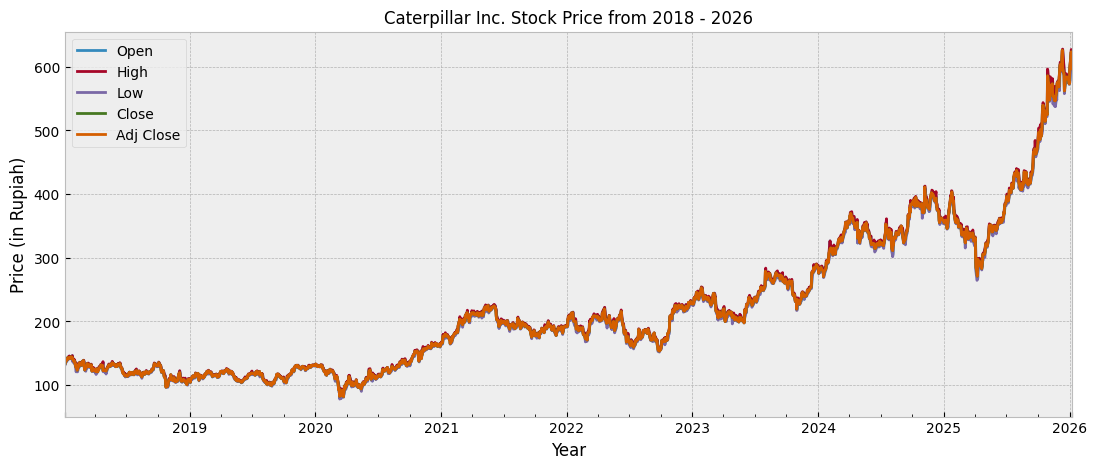

In [ ]:
# Visualize the historical prices from 2018 - 2026
cat_df[['Open','High','Low','Close','Adj Close']].plot(figsize=(13,5))
plt.title('Caterpillar Inc. Stock Price from 2018 - 2026', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (in Rupiah)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Financial Statement

In [ ]:
# Reset index (important so index becomes a column)
balance_sheet_statements = companies.get_balance_sheet_statement()
df_balance_sheet_statements_pd = balance_sheet_statements.reset_index()

# Convert pandas DataFrame -> Spark DataFrame
df_balance_statement = spark.createDataFrame(df_balance_sheet_statements_pd)

# Create temporary Spark SQL view
df_balance_statement.createOrReplaceTempView("cat_balance_statement")

# Query Spark SQL
df_balance_statement = spark.sql("""
    SELECT
        level_0 as Symbol,
        level_1 as `Statement Type`,
        TRY_CAST(`2021` AS BIGINT) AS `2021`,
        TRY_CAST(`2022` AS BIGINT) AS `2022`,
        TRY_CAST(`2023` AS BIGINT) AS `2023`,
        TRY_CAST(`2024` AS BIGINT) AS `2024`,
        TRY_CAST(`2025` AS BIGINT) AS `2025`,
        TRY_CAST((`2021`+`2022`+`2023`+`2024`+`2025`) AS BIGINT) as Total,
        CURRENT_TIMESTAMP AS `ETL Date`
    FROM cat_balance_statement
    ORDER BY TRY_CAST((`2021`+`2022`+`2023`+`2024`+`2025`) AS BIGINT) DESC;
""")

# Show result
df_balance_statement.show(1000)

Obtaining balance data: 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]


2026-01-10 07:03:39 - financetoolkit - ERROR - The following tickers are using a premium query parameter from Financial Modeling Prep: CAT, KMTUY, HTHIY.
This is not available in your current plan. Consider upgrading your plan to a higher plan. You can get 15% off by using the following affiliate link which also supports the project: https://www.jeroenbouma.com/fmp


ERROR:financetoolkit:The following tickers are using a premium query parameter from Financial Modeling Prep: CAT, KMTUY, HTHIY.
This is not available in your current plan. Consider upgrading your plan to a higher plan. You can get 15% off by using the following affiliate link which also supports the project: https://www.jeroenbouma.com/fmp


+------+--------------------+------------+--------------+--------------+--------------+--------------+--------------+--------------------+
|Symbol|      Statement Type|        2021|          2022|          2023|          2024|          2025|         Total|            ETL Date|
+------+--------------------+------------+--------------+--------------+--------------+--------------+--------------+--------------------+
| HTHIY|        Total Assets|           0|13887502000000|12501414000000|12221284000000|13284813000000|51895013000000|2026-01-10 07:03:...|
| HTHIY|   Total Liabilities|           0| 8532225000000| 7165847000000| 6361681000000| 7253396000000|29313149000000|2026-01-10 07:03:...|
| HTHIY|    Invested Capital|           0| 7468548000000| 7156202000000| 6883727000000| 7053207000000|28561684000000|2026-01-10 07:03:...|
| HTHIY|        Fixed Assets|           0| 7288071000000| 6572879000000| 6366687000000| 6686970000000|26914607000000|2026-01-10 07:03:...|
| HTHIY|Total Capitalizatio

+------+--------------+-----------+--------------+--------------+--------------+--------------+--------------+--------------------------+
|Symbol|Statement Type|2021       |2022          |2023          |2024          |2025          |Total         |ETL Date                  |
+------+--------------+-----------+--------------+--------------+--------------+--------------+--------------+--------------------------+
|HTHIY |Total Assets  |0          |13887502000000|12501414000000|12221284000000|13284813000000|51895013000000|2026-01-10 07:03:40.731848|
|KMTUY |Total Assets  |0          |4347522000000 |4875847000000 |5636656000000 |5773523000000 |20633548000000|2026-01-10 07:03:40.731848|
|CAT   |Total Assets  |82793000000|81943000000   |87476000000   |87764000000   |NULL          |NULL          |2026-01-10 07:03:40.731848|
+------+--------------+-----------+--------------+--------------+--------------+--------------+--------------+--------------------------+



<Figure size 800x600 with 0 Axes>

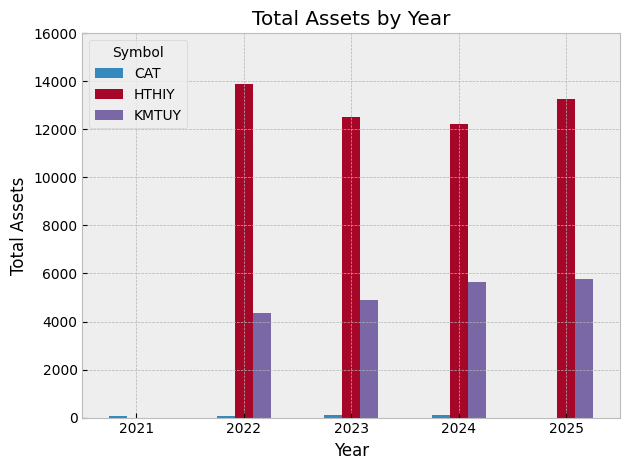

In [ ]:
# Show total assets
df_total_asset = spark.sql("""
    SELECT
        level_0 as Symbol,
        level_1 as `Statement Type`,
        TRY_CAST(`2021` AS BIGINT) AS `2021`,
        TRY_CAST(`2022` AS BIGINT) AS `2022`,
        TRY_CAST(`2023` AS BIGINT) AS `2023`,
        TRY_CAST(`2024` AS BIGINT) AS `2024`,
        TRY_CAST(`2025` AS BIGINT) AS `2025`,
        TRY_CAST((`2021`+`2022`+`2023`+`2024`+`2025`) AS BIGINT) as Total,
        CURRENT_TIMESTAMP AS `ETL Date`
    FROM cat_balance_statement
    WHERE level_1 = 'Total Assets'
    ORDER BY TRY_CAST((`2021`+`2022`+`2023`+`2024`+`2025`) AS BIGINT) DESC;
""")

# Show result
df_total_asset.show(truncate=False)

# Convert Spark DataFrame to Pandas
pdf_total_asset = df_total_asset.select(
    "Symbol", "2021", "2022", "2023", "2024", "2025"
).toPandas()

# Melt dataframe
pdf_long = pdf_total_asset.melt(
    id_vars="Symbol",
    var_name="Year",
    value_name="Total_Assets"
)

# Pivot for stacked bar
pivot_df = pdf_long.pivot(
    index="Year",
    columns="Symbol",
    values="Total_Assets"
)

# Plot
plt.figure(figsize=(8, 6))
pivot_df.plot(
    kind="bar",
    stacked=False
)

plt.title("Total Assets by Year")
plt.xlabel("Year")
plt.ylabel("Total Assets")
plt.xticks(rotation=0)
plt.legend(title="Symbol")
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.tight_layout()
plt.show()

+------+-----------------+-----------+-------------+-------------+-------------+-------------+--------------+--------------------------+
|Symbol|Statement Type   |2021       |2022         |2023         |2024         |2025         |Total         |ETL Date                  |
+------+-----------------+-----------+-------------+-------------+-------------+-------------+--------------+--------------------------+
|HTHIY |Total Liabilities|0          |8532225000000|7165847000000|6361681000000|7253396000000|29313149000000|2026-01-10 07:03:42.615939|
|KMTUY |Total Liabilities|0          |1991245000000|2197892000000|2438204000000|2428670000000|9056011000000 |2026-01-10 07:03:42.615939|
|CAT   |Total Liabilities|66277000000|66052000000  |67973000000  |68270000000  |NULL         |NULL          |2026-01-10 07:03:42.615939|
+------+-----------------+-----------+-------------+-------------+-------------+-------------+--------------+--------------------------+



<Figure size 800x600 with 0 Axes>

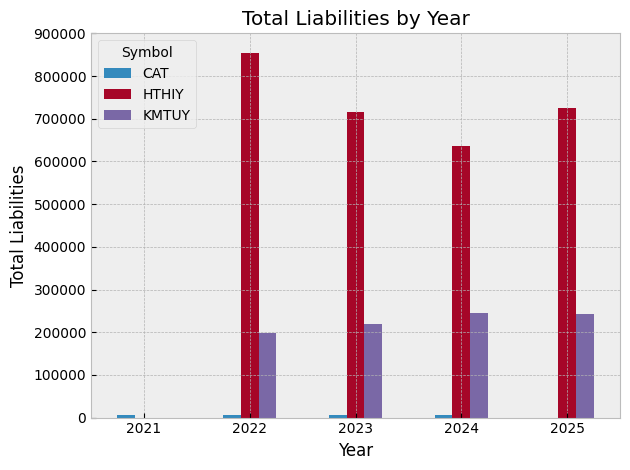

In [ ]:
# Show total liabilities
df_total_liabilities = spark.sql("""
    SELECT
        level_0 as Symbol,
        level_1 as `Statement Type`,
        TRY_CAST(`2021` AS BIGINT) AS `2021`,
        TRY_CAST(`2022` AS BIGINT) AS `2022`,
        TRY_CAST(`2023` AS BIGINT) AS `2023`,
        TRY_CAST(`2024` AS BIGINT) AS `2024`,
        TRY_CAST(`2025` AS BIGINT) AS `2025`,
        TRY_CAST((`2021`+`2022`+`2023`+`2024`+`2025`) AS BIGINT) as Total,
        CURRENT_TIMESTAMP AS `ETL Date`
    FROM cat_balance_statement
    WHERE level_1 = 'Total Liabilities'
    ORDER BY TRY_CAST((`2021`+`2022`+`2023`+`2024`+`2025`) AS BIGINT) DESC;
""")

# Show result
df_total_liabilities.show(truncate=False)

# Convert Spark DataFrame to Pandas
pdf_total_liabilities = df_total_liabilities.select(
    "Symbol", "2021", "2022", "2023", "2024", "2025"
).toPandas()

# Melt dataframe
pdf_long = pdf_total_liabilities.melt(
    id_vars="Symbol",
    var_name="Year",
    value_name="Total_Liabilities"
)

# Pivot for stacked bar
pivot_df = pdf_long.pivot(
    index="Year",
    columns="Symbol",
    values="Total_Liabilities"
)

# Plot
plt.figure(figsize=(8, 6))
pivot_df.plot(
    kind="bar",
    stacked=False
)

plt.title("Total Liabilities by Year")
plt.xlabel("Year")
plt.ylabel("Total Liabilities")
plt.xticks(rotation=0)
plt.legend(title="Symbol")
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10000000).astype(int))
plt.tight_layout()
plt.show()

## Company Overviews

In [ ]:
toolkit = Toolkit(["CAT", "KMTUY", "HTHIY"], api_key=API_KEY)
toolkit.get_profile()

Obtaining company profiles: 100%|██████████| 3/3 [00:00<00:00,  9.62it/s]


,CAT,KMTUY,HTHIY
Symbol,CAT,KMTUY,HTHIY
Price,617.62,33.79,33.73
Market Capitalization,289341938218,31032622736,77111552525
Beta,1.568,0.708,0.368
Last Dividend,5.84,1.35,0.2459
Range,267.3-627.5,24.75-39.56,18.3-58.19
Change,9.49,0.6000000000000001,0.75
Change %,1.56052,1.80777,2.27411
Volume,1819613,8349,54501
Average Volume,2729141,133833,394252


## Financial Ratios

In [ ]:
# Collect all Ratios
eff_ratio = companies.ratios.collect_efficiency_ratios()
print("Efficiency Ratios\n")
print(eff_ratio)

# Get an Individual Ratio
ind_ratio = companies.ratios.get_asset_turnover_ratio()
print("\nIndividual Ratios\n")
print(ind_ratio)

Obtaining financial statements:   0%|          | 0/2 [00:00<?, ?it/s]

2026-01-10 07:03:45 - financetoolkit - ERROR - The following tickers are using a premium query parameter from Financial Modeling Prep: CAT, KMTUY, HTHIY.
This is not available in your current plan. Consider upgrading your plan to a higher plan. You can get 15% off by using the following affiliate link which also supports the project: https://www.jeroenbouma.com/fmp


ERROR:financetoolkit:The following tickers are using a premium query parameter from Financial Modeling Prep: CAT, KMTUY, HTHIY.
This is not available in your current plan. Consider upgrading your plan to a higher plan. You can get 15% off by using the following affiliate link which also supports the project: https://www.jeroenbouma.com/fmp
Obtaining financial statements:  50%|█████     | 1/2 [00:00<00:00,  1.53it/s]

2026-01-10 07:03:45 - financetoolkit - ERROR - The following tickers are using a premium query parameter from Financial Modeling Prep: CAT, KMTUY, HTHIY.
This is not available in your current plan. Consider upgrading your plan to a higher plan. You can get 15% off by using the following affiliate link which also supports the project: https://www.jeroenbouma.com/fmp


ERROR:financetoolkit:The following tickers are using a premium query parameter from Financial Modeling Prep: CAT, KMTUY, HTHIY.
This is not available in your current plan. Consider upgrading your plan to a higher plan. You can get 15% off by using the following affiliate link which also supports the project: https://www.jeroenbouma.com/fmp
Obtaining financial statements: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


Efficiency Ratios

                                             2021     2022     2023     2024  \
CAT   Days of Inventory Outstanding           NaN 131.9625 136.8219 146.8974   
      Days of Sales Outstanding               NaN 108.2341   99.847  106.069   
      Operating Cycle                         NaN 240.1967 236.6689 252.9665   
      Days of Accounts Payable Outstanding    NaN  73.3353  69.1506  68.5436   
      Cash Conversion Cycle                   NaN 166.8614 167.5183 184.4228   
      Cash Conversion Efficiency           0.1412   0.1307   0.1921   0.1857   
      Receivables Turnover                    NaN   0.2965   0.2736   0.2906   
      Inventory Turnover Ratio                NaN   2.7659   2.6677   2.4847   
      Accounts Payable Turnover Ratio         NaN   4.9771   5.2783   5.3251   
      SGA-to-Revenue Ratio                 0.1053   0.0951    0.095   0.1029   
      Fixed Asset Turnover                    NaN   1.5337   1.7045   1.5691   
      Asset Turnover 